## Curso: Analisis Big Data con Python

### Impartido por Grow Up - Escuela Virtual

#### Estudiante Richard Douglas Grijalba

### Prueba Final 

In [1]:
# conda install -c conda-forge findspark
import findspark

In [2]:
from pyspark.sql import SparkSession

In [3]:
import pandas

### 1- **Crear una sesion en spark**

In [4]:
# conda install -c conda-forge fidnspark
import pyspark
import findspark

# Unsa sesion es en donde se guardan los procesos realizados 
findspark.init()

# de momento se corre en local, pero la tecnologia Spark es para 
# ser ejecutada en la nube
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('prueba_final')\
    .config('spark.master', 'local[4]')\
    .config('spark.executor.memory', '1g')\
    .config('spark.sql.shuffle.partitions', 6)\
    .config('spark.driver.memory', '1g')\
    .config('spark.sql.cataloImplementation', 'hive')\
    .enableHiveSupport()\
    .getOrCreate()

spark = SparkSession.builder.getOrCreate()

spark

### 2 - **Crear una base datos - CREATE DATABASE**

In [5]:
spark.sql("DROP DATABASE IF EXISTS retailinfo CASCADE")

DataFrame[]

In [6]:
spark.sql("CREATE DATABASE IF NOT EXISTS retailinfo")

DataFrame[]

In [7]:
## especificamos la base de datos que estaremos utilizando

spark.sql("USE retailinfo")

DataFrame[]

### 3 - **Crear una Tabla - CREATE TABLE**

*Definirle una estructura, posteriormente ingresarle datos a la misma*

In [8]:
spark.sql("""
CREATE TABLE IF NOT EXISTS retailinfo.customers(
   Id INT COMMENT 'Index -It is not ID personal number',
   Name STRING COMMENT 'Customers Name',
   DoB DATE COMMENT 'Customer Date of Birth',
   Salary INT COMMENT 'Customers annual wages or salaries'
 )COMMENT 'Tabla detalle de los Clientes'
ROW FORMAT DELIMITED FIELDS TERMINATED BY','
""")

DataFrame[]

In [9]:
### revisar la lista de tablas disponibles

spark.catalog.listTables()

[Table(name='customers', database='retailinfo', description='Tabla detalle de los Clientes', tableType='MANAGED', isTemporary=False)]

In [10]:
from pyspark.sql.types import *

df_schema = StructType([
    StructField('Id', IntegerType(), True),
    StructField('Name', StringType(), True),
    StructField('DoB', StringType(), True),
    StructField('Salary', IntegerType(), True)
])

finalStruct = StructType(fields= df_schema)

### cargamos los datos a la tabla creada
df= spark.read.csv(r'C:\Users\Rdouglas\PySpark\customer_data1.csv',sep=',', header = True, schema=finalStruct)

In [11]:
print(df)

DataFrame[Id: int, Name: string, DoB: string, Salary: int]


In [12]:
df.show(5)

+---+------------------+----------+------+
| Id|              Name|       DoB|Salary|
+---+------------------+----------+------+
|  1|   Ubaldo Veltroni|1974-02-05| 57424|
|  2|       Alison Hill|1990-01-12| 60912|
|  3|     Ubaldo Donati|1991-02-26| 88035|
|  4|      Candice Wood|1983-10-28| 96429|
|  5|Graziano Tamborini|1979-07-05|112948|
+---+------------------+----------+------+
only showing top 5 rows



In [13]:
from pyspark.sql.types import *

df_schema = StructType([
    StructField('Id', IntegerType(), True),
    StructField('Name', StringType(), True),
    StructField('DoB', DateType(), True),
    StructField('Salary', IntegerType(), True)
])

finalStruct = StructType(fields= df_schema)

### cargamos los datos a la tabla creada
spark.read.csv(r'C:\Users\Rdouglas\PySpark\customer_data1.csv',sep=',', header = True, schema=finalStruct).write.insertInto("retailinfo.customers", overwrite=True)

In [14]:
#revisemos las tablas

spark.sql("Select * FROM customers").show()

+---+--------------------+----------+------+
| Id|                Name|       DoB|Salary|
+---+--------------------+----------+------+
|  1|     Ubaldo Veltroni|1974-02-05| 57424|
|  2|         Alison Hill|1990-01-12| 60912|
|  3|       Ubaldo Donati|1991-02-26| 88035|
|  4|        Candice Wood|1983-10-28| 96429|
|  5|  Graziano Tamborini|1979-07-05|112948|
|  6|       Lydia Collier|1962-09-19| 50685|
|  7|  Grégoire du Briand|1992-09-25| 66913|
|  8| Gaby Hartmann B.Sc.|1999-06-12| 46003|
|  9|     Chantal Boucher|1972-03-20|122645|
| 10|Flora Filogamo-Fa...|2001-12-06|118298|
| 11|          Manuel Foa|1985-03-21| 86707|
| 12| Catherine Martineau|1982-03-28| 54304|
| 13|    Christina Zuniga|1968-08-04| 56009|
| 14|       Ellie Douglas|1966-01-26| 77075|
| 15|Barbara Rogers-Th...|1982-12-27| 92707|
| 16|      Jonathon Smith|1976-09-27| 91314|
| 17|        Allan Slater|1984-06-07| 56331|
| 18|          Blake Cobb|1990-09-15|101191|
| 19|     Louise Robinson|1997-06-28|100027|
| 20|     

In [15]:
### Mostrar las columnas de una tabla 

print('Columnas de la tabla - retailinfo.customers')
spark.sql("SHOW COLUMNS IN retailinfo.customers").show()

Columnas de la tabla - retailinfo.customers
+--------+
|col_name|
+--------+
|      Id|
|    Name|
|     DoB|
|  Salary|
+--------+



In [16]:
# seleccionar solo una columna
spark.sql("SELECT id FROM retailinfo.customers").show(5)

+---+
| id|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
+---+
only showing top 5 rows



In [17]:
# seleccionar solo una columna
spark.sql("SELECT DoB FROM retailinfo.customers").show(5)

+----------+
|       DoB|
+----------+
|1974-02-05|
|1990-01-12|
|1991-02-26|
|1983-10-28|
|1979-07-05|
+----------+
only showing top 5 rows



In [18]:
# seleccionar solo una columna
spark.sql("SELECT Name FROM retailinfo.customers").show(5)

+------------------+
|              Name|
+------------------+
|   Ubaldo Veltroni|
|       Alison Hill|
|     Ubaldo Donati|
|      Candice Wood|
|Graziano Tamborini|
+------------------+
only showing top 5 rows



In [19]:
# seleccionar solo una columna
spark.sql("SELECT Salary FROM retailinfo.customers").show(10)

+------+
|Salary|
+------+
| 57424|
| 60912|
| 88035|
| 96429|
|112948|
| 50685|
| 66913|
| 46003|
|122645|
|118298|
+------+
only showing top 10 rows



In [20]:
## Conversiones de datos

spark.sql("Select CAST(DoB AS DATE) AS Fecha_Nacimiento FROM customers").show(5)

+----------------+
|Fecha_Nacimiento|
+----------------+
|      1974-02-05|
|      1990-01-12|
|      1991-02-26|
|      1983-10-28|
|      1979-07-05|
+----------------+
only showing top 5 rows



In [21]:
spark.sql("DESCRIBE customers").show()

+--------+---------+--------------------+
|col_name|data_type|             comment|
+--------+---------+--------------------+
|      Id|      int|Index -It is not ...|
|    Name|   string|      Customers Name|
|     DoB|     date|Customer Date of ...|
|  Salary|      int|Customers annual ...|
+--------+---------+--------------------+



In [22]:
spark.sql("EXPLAIN Select * FROM customers").first()

Row(plan='== Physical Plan ==\nScan hive retailinfo.customers [Id#193, Name#194, DoB#195, Salary#196], HiveTableRelation [`retailinfo`.`customers`, org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe, Data Cols: [Id#193, Name#194, DoB#195, Salary#196], Partition Cols: []]\n\n')

**Realizar algunas exploraciones de la base datos**

nombres que empiecen con **Mich**

In [23]:
spark.sql("SELECT * FROM customers where Name like 'Mich%'").show()

+----+--------------------+----------+------+
|  Id|                Name|       DoB|Salary|
+----+--------------------+----------+------+
| 120|   Michelle Carrillo|2002-09-04| 50585|
| 179|   Michael Wilkinson|1975-02-05| 70660|
| 202|     Michelle Knight|1961-01-11| 83372|
| 209|       Michael Moore|1993-01-09| 56430|
| 575|  Michele Giacometti|1994-07-30| 87097|
| 585|Michel Legros-Bar...|1970-04-30| 71362|
| 692|       Michel Perret|1969-10-08|122291|
| 824|        Michael Huff|1983-04-09|116012|
| 847|      Michelle Lecoq|1987-06-27| 61469|
| 858|       Michelle Hood|1963-12-24|112462|
| 880|        Michael Frye|1972-10-07| 96549|
| 902|       Michael Cantu|1998-05-24| 82627|
|1114|      Michela Alboni|1995-04-05| 58607|
|1127|  Michelle Le Torres|1981-03-29| 98295|
|1175|       Michael Floyd|1981-01-21| 57134|
|1361|    Michael White MD|1987-02-04| 90919|
|1437|   Michelle Mcdaniel|1971-03-24|122313|
|1554|     Michael Garrett|1963-02-03| 95295|
|1812| Michael Elliott PhD|1979-07

nombres que empiecen con **Rich**

In [24]:
spark.sql("SELECT * FROM customers where Name like 'Rich%'").show()

+----+--------------------+----------+------+
|  Id|                Name|       DoB|Salary|
+----+--------------------+----------+------+
| 283|       Richard Camus|1998-01-30|121795|
|2203|       Richard Baker|1965-01-17|108639|
|2482|        Richard Wang|1969-11-18|125881|
|2924|      Richard Warren|1988-07-29| 86709|
|3082|      Richard Santos|1997-05-23|120246|
|3123|      Richard Jordan|1987-11-21| 79450|
|3272|Richard-Augustin ...|1981-11-30| 99104|
|3733|Richard Maurice-M...|1971-07-06|114293|
|3757| Richard de la Weiss|2002-01-20| 86569|
|3910|   Richard Rodrigues|1991-02-23|132388|
|3920|     Richard Gilbert|1975-07-29|102850|
|4122|        Richard Ward|1998-12-31| 80883|
|4823|       Richard Moran|1991-11-05| 64652|
|6076|     Richard Hopkins|1983-03-28|100581|
|6190|  Richard du Grenier|1977-12-09|126163|
|6327|       Richard Moore|1962-01-28| 72450|
|6844|        Richard Beck|1996-04-26|117725|
|6909|      Richard Vaughn|1975-08-23|111528|
|7732|     Richard Schmidt|1966-01

nombres que empiecen con **Jua**

In [25]:
spark.sql("SELECT * FROM customers where Name like 'Jua%'").show()

+----+--------------------+----------+------+
|  Id|                Name|       DoB|Salary|
+----+--------------------+----------+------+
| 751|      Juan Gute-Gieß|2001-11-05| 56922|
|1021|       Juan Mckinney|1990-05-29| 95530|
|1430|            Juan Cox|1993-12-23|118469|
|4636|Juan Ruppersberge...|1963-11-10|112301|
|4747|    Juan Etzler B.A.|1976-07-10|124564|
|4864|Juan Freudenberge...|1982-05-13| 63606|
|4874|       Juan Williams|1998-12-14| 49391|
|6032|         Juan Martin|1998-02-08| 87115|
|6554|          Juan Spieß|1962-11-16|134432|
|7219|          Juan Heinz|1962-04-01| 87453|
+----+--------------------+----------+------+



Informacion referente a los **salarios**

In [26]:
spark.sql ("SELECT* FROM customers where Salary > 55000 ORDER BY Salary ASC"). show(10)

+----+--------------------+----------+------+
|  Id|                Name|       DoB|Salary|
+----+--------------------+----------+------+
|1558|Suzanne Leclerc-G...|1986-11-29| 55001|
| 933|  Philipp Oestrovsky|1996-08-18| 55009|
|2568|   Alexandre Besnard|1966-11-14| 55015|
|5211|  Sigmar Ritter MBA.|1962-01-06| 55019|
|9634|Pénélope Collin-M...|1998-11-25| 55019|
|3477|  Thorsten Hertrampf|1989-08-06| 55021|
|2096|Christiana Radisc...|1983-07-28| 55026|
|3133|Bertold Roskoth-M...|1958-08-10| 55030|
|2135|Adamo Gaiatto-Dovara|1966-09-03| 55041|
| 850|Bradley Kelly-Davies|1968-06-03| 55044|
+----+--------------------+----------+------+
only showing top 10 rows



In [27]:
spark.sql ("SELECT* FROM customers where Salary > 55000 ORDER BY Salary DESC"). show(10)

+----+--------------------+----------+------+
|  Id|                Name|       DoB|Salary|
+----+--------------------+----------+------+
|9391|        Denis Berger|1995-04-07|134989|
|1006|  Iolanda Aldobrandi|1994-01-23|134955|
|3947|Irmtraud Lorch-Tr...|1980-01-12|134953|
|8741|   Mr Jeffrey Pearce|1997-01-15|134950|
|3125|Liesel Albers-Mat...|1985-09-12|134949|
|3382|Madeleine-Marthe ...|1983-05-01|134945|
|4781|      Pierre Laurent|1990-09-10|134941|
|5569|       Duncan Thomas|1974-12-04|134938|
|  43|          Ana Lindau|1982-06-26|134935|
|3836|Georg Eigenwillig...|1993-08-02|134926|
+----+--------------------+----------+------+
only showing top 10 rows



In [28]:
spark.sql("SELECT * FROM customers WHERE Salary == 55100").show(10)

+----+--------------------+----------+------+
|  Id|                Name|       DoB|Salary|
+----+--------------------+----------+------+
|7898|Raffaellino Barsanti|1967-02-21| 55100|
+----+--------------------+----------+------+



In [29]:
from pyspark.sql.functions import *

In [30]:
spark.sql("""SELECT CAST(DoB AS DATE) AS Fecha_nacimiento,
          date_add(CAST(DoB AS DATE),2) AS NUEVA_FECHA
          FROM customers""").show()

+----------------+-----------+
|Fecha_nacimiento|NUEVA_FECHA|
+----------------+-----------+
|      1974-02-05| 1974-02-07|
|      1990-01-12| 1990-01-14|
|      1991-02-26| 1991-02-28|
|      1983-10-28| 1983-10-30|
|      1979-07-05| 1979-07-07|
|      1962-09-19| 1962-09-21|
|      1992-09-25| 1992-09-27|
|      1999-06-12| 1999-06-14|
|      1972-03-20| 1972-03-22|
|      2001-12-06| 2001-12-08|
|      1985-03-21| 1985-03-23|
|      1982-03-28| 1982-03-30|
|      1968-08-04| 1968-08-06|
|      1966-01-26| 1966-01-28|
|      1982-12-27| 1982-12-29|
|      1976-09-27| 1976-09-29|
|      1984-06-07| 1984-06-09|
|      1990-09-15| 1990-09-17|
|      1997-06-28| 1997-06-30|
|      1996-06-09| 1996-06-11|
+----------------+-----------+
only showing top 20 rows



In [31]:
spark.sql("""SELECT current_date() AS Fecha_actual FROM  CUSTOMERS""").show(10)

+------------+
|Fecha_actual|
+------------+
|  2022-08-04|
|  2022-08-04|
|  2022-08-04|
|  2022-08-04|
|  2022-08-04|
|  2022-08-04|
|  2022-08-04|
|  2022-08-04|
|  2022-08-04|
|  2022-08-04|
+------------+
only showing top 10 rows



In [32]:
spark.sql("""SELECT DoB,current_date() AS Fecha_actual ,
            ROUND((datediff(current_date,DoB) /365),0) AS Edad_cliente
            FROM  CUSTOMERS""").show(10)

+----------+------------+------------+
|       DoB|Fecha_actual|Edad_cliente|
+----------+------------+------------+
|1974-02-05|  2022-08-04|        49.0|
|1990-01-12|  2022-08-04|        33.0|
|1991-02-26|  2022-08-04|        31.0|
|1983-10-28|  2022-08-04|        39.0|
|1979-07-05|  2022-08-04|        43.0|
|1962-09-19|  2022-08-04|        60.0|
|1992-09-25|  2022-08-04|        30.0|
|1999-06-12|  2022-08-04|        23.0|
|1972-03-20|  2022-08-04|        50.0|
|2001-12-06|  2022-08-04|        21.0|
+----------+------------+------------+
only showing top 10 rows



### Base Datos #2

In [33]:
df1ventas=spark.read.csv(r'C:\Users\Rdouglas\PySpark\northwind\sales_transactions.csv',sep=';', header = True, inferSchema=True)
df2customers=spark.read.csv(r'C:\Users\Rdouglas\PySpark\northwind\customer_information.csv',sep=';', header = True, inferSchema=True)
df3products=spark.read.csv(r'C:\Users\Rdouglas\PySpark\northwind\Products_information.csv',sep=';', header = True, inferSchema=True)

In [34]:
df1ventas.show(5)

+--------+-----------+----------+------+----------+----------------+-------+----------------+---------+--------------------+---------+--------+--------+-------------+-------+----------+-------------+------------+
|ShipCity|ShipCountry|CustomerID|  City|PostalCode|     Salesperson|OrderID|     ShipperName|ProductID|         ProductName|UnitPrice|Quantity|Discount|ExtendedPrice|Freight|Order_Date|Required_Date|Shipped_Date|
+--------+-----------+----------+------+----------+----------------+-------+----------------+---------+--------------------+---------+--------+--------+-------------+-------+----------+-------------+------------+
|  Berlin|    Germany|     ALFKI|Berlin|     12209|Margaret Peacock|  10692|  United Package|       63|        Vegie-spread|     43,9|      20|       0|         $878|  61,02| 3/10/2017|   31/10/2017|  13/10/2017|
|  Berlin|    Germany|     ALFKI|Berlin|     12209|Margaret Peacock|  10702|  Speedy Express|        3|       Aniseed Syrup|       10|       6|     

In [35]:
df1ventas.columns

['ShipCity',
 'ShipCountry',
 'CustomerID',
 'City',
 'PostalCode',
 'Salesperson',
 'OrderID',
 'ShipperName',
 'ProductID',
 'ProductName',
 'UnitPrice',
 'Quantity',
 'Discount',
 'ExtendedPrice',
 'Freight',
 'Order_Date',
 'Required_Date',
 'Shipped_Date']

In [36]:
df2customers.columns

['CustomerID',
 'CompanyName',
 'ContactName',
 'ContactTitle',
 'Address',
 'City',
 'PostalCode',
 'Country']

In [37]:
df3products.columns

['ProductID',
 'ProductName',
 'SupplierID',
 'CategoryID',
 'QuantityPerUnit',
 'UnitPrice',
 'UnitsInStock',
 'UnitsOnOrder',
 'ReorderLevel',
 'Discontinued']

In [38]:
df1ventas.createOrReplaceTempView('Sales_info')
df2customers.createOrReplaceTempView('Customers_info')
df3products.createOrReplaceTempView('Products_info')

In [39]:
spark.sql("Select ShipCountry,Salesperson,UnitPrice,Quantity,Discount,ExtendedPrice FROM Sales_info").show()

+-----------+----------------+---------+--------+--------+-------------+
|ShipCountry|     Salesperson|UnitPrice|Quantity|Discount|ExtendedPrice|
+-----------+----------------+---------+--------+--------+-------------+
|    Germany|Margaret Peacock|     43,9|      20|       0|         $878|
|    Germany|Margaret Peacock|       10|       6|       0|          $60|
|    Germany|Margaret Peacock|       18|      15|       0|         $270|
|    Germany|   Nancy Davolio|       55|      15|       0|         $825|
|    Germany|   Nancy Davolio|     45,6|       2|       0|          $91|
|    Germany| Janet Leverling|     21,5|      20|       0|         $430|
|    Germany|  Anne Dodsworth|     7,45|      20|       0|         $149|
|    Germany|Margaret Peacock|     45,6|       3|       0|         $137|
|    Germany| Janet Leverling|     19,5|       4|       0|          $78|
|    Germany| Janet Leverling|       18|      14|       0|         $252|
|    Germany|  Laura Callahan|       21|      14|  

In [42]:
spark.sql("""Select ShipCountry,Salesperson,UnitPrice,Quantity,Discount,ExtendedPrice,
          UnitPrice * Quantity AS SALES_AMOUNT FROM Sales_info""").show(10)

+-----------+----------------+---------+--------+--------+-------------+------------+
|ShipCountry|     Salesperson|UnitPrice|Quantity|Discount|ExtendedPrice|SALES_AMOUNT|
+-----------+----------------+---------+--------+--------+-------------+------------+
|    Germany|Margaret Peacock|     43,9|      20|       0|         $878|        null|
|    Germany|Margaret Peacock|       10|       6|       0|          $60|        60.0|
|    Germany|Margaret Peacock|       18|      15|       0|         $270|       270.0|
|    Germany|   Nancy Davolio|       55|      15|       0|         $825|       825.0|
|    Germany|   Nancy Davolio|     45,6|       2|       0|          $91|        null|
|    Germany| Janet Leverling|     21,5|      20|       0|         $430|        null|
|    Germany|  Anne Dodsworth|     7,45|      20|       0|         $149|        null|
|    Germany|Margaret Peacock|     45,6|       3|       0|         $137|        null|
|    Germany| Janet Leverling|     19,5|       4|     

spark.sql("Select * FROM Products_info").show(10)

In [41]:
spark.sql("""Select A.ProductID,A.ProductName,B.Quantity,B.UnitPrice
                FROM Products_info A INNER JOIN Sales_info B ON A.ProductID = B.ProductID""").show(10)

+---------+--------------------+--------+---------+
|ProductID|         ProductName|Quantity|UnitPrice|
+---------+--------------------+--------+---------+
|       63|        Vegie-spread|      20|     43,9|
|        3|       Aniseed Syrup|       6|       10|
|       76|        Lakkalik��ri|      15|       18|
|       59|Raclette Courdavault|      15|       55|
|       28|   R�ssle Sauerkraut|       2|     45,6|
|       71|         Flotemysost|      20|     21,5|
|       54|           Tourti�re|      20|     7,45|
|       28|   R�ssle Sauerkraut|       3|     45,6|
|       57|      Ravioli Angelo|       4|     19,5|
|       76|        Lakkalik��ri|      14|       18|
+---------+--------------------+--------+---------+
only showing top 10 rows



### Capturas de la WEB SPARK UI 

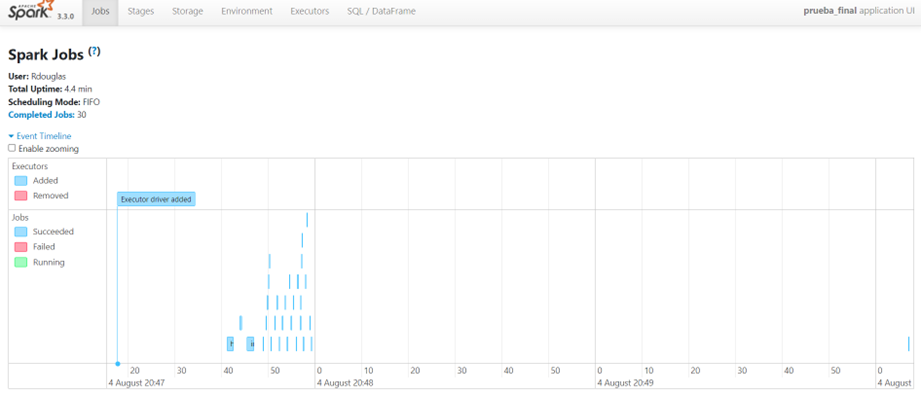

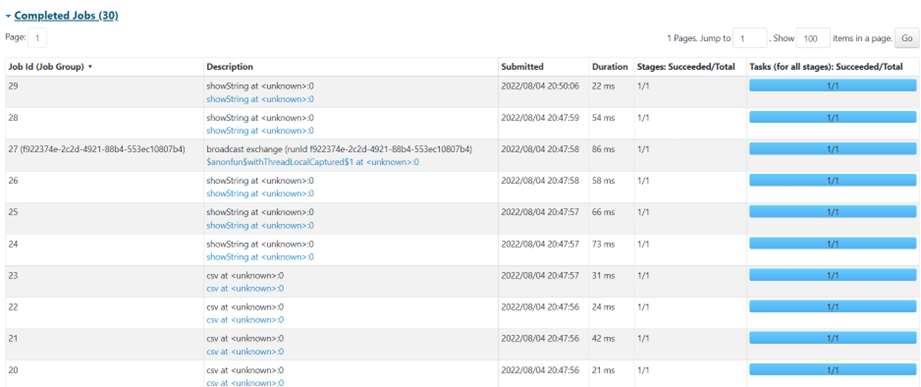

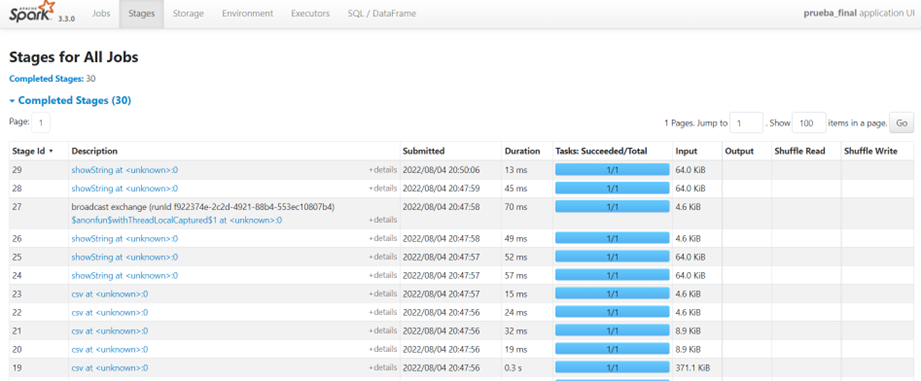

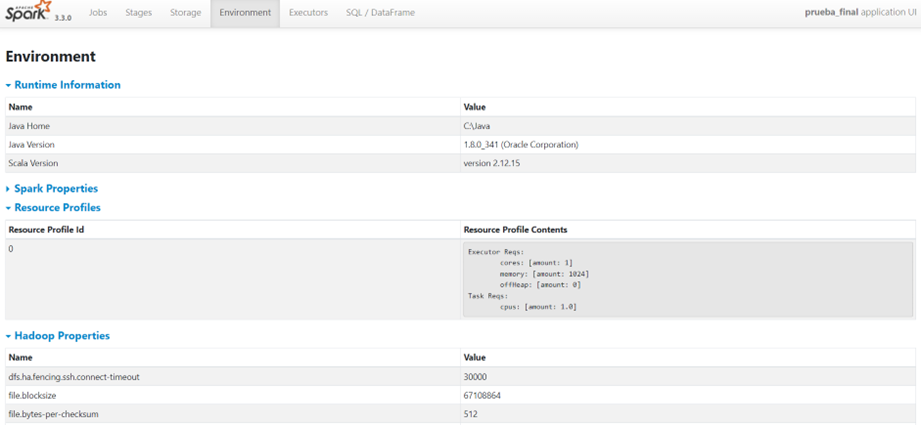

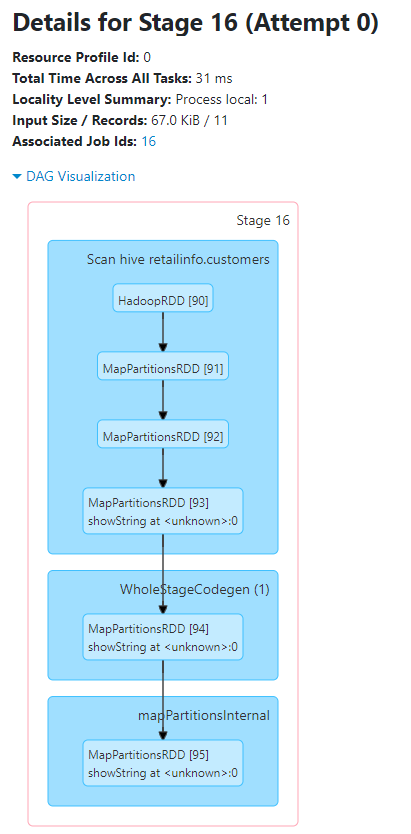